# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [141]:
# Importing basic libraries
import pandas as pd
import numpy as np

# Importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Scikit-Learn libraries for ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing statsmodels libraries to build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

#Importing libraries to split data and tune different models
from sklearn.model_selection import train_test_split, GridSearchCV

#Importing other functions we may require from Scikit-Learn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Code to ignore warnings
import warnings;
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

## Data Overview

- Observations
- Sanity checks

In [142]:
#Importing ExtraaLearn dataset
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/PythonCourse/ClassificationHypTesting/ExtraaLearn.csv"

#Read the data
dfLearn = pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
#Checking first 5 rows
dfLearn.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


#### Observations:
The DataFrame has 15 columns. Data in each row corresponds to a lead.

In [144]:
#Checking last 5 rows
dfLearn.tail(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [145]:
#Checking the shape of data
dfLearn.shape

(4612, 15)

#### Observations:
The shape property provides the number of rows (first element) and number of columns (second element) of the dataset. So per the output, there are 4612 rows and 15 columns in the dataset.

In [146]:
#Checking data types of the columns
dfLearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [147]:
dfLearn.isnull().values.any()

False

#### Observations:


*   No missing values observed in any columns
*   age, website_visits, time_spent_on_website and status are 4 integer
columns in the dataset.
*   page_views_per_visit column is of datatype float and hence will have decimals.
*   The rest of the columns are of type 'object', indicating that they are caregorical.










In [148]:
# checking for duplicate values
dfLearn.duplicated().sum()

0

* No duplicate entries found in the data

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [149]:
#Checking for unique values in each column
dfLearn.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

##### Observations:

We can drop the column - ID as it is unique for each customer and will not add value to the model.

In [150]:
# Before dropping the ID column that has unique values, copying data to another variable to avoid any changes to original data

data = dfLearn.copy()

In [151]:
# Dropping ID column
data.drop(columns='ID',inplace=True)

In [152]:
#Checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


### Observations:

*   Website Visits has some outliers at the right end as the 75th percentile value is 5 and the max value is 30. We need to explore this further.
*   Page Views per Vist also has some outliers as the 75th percentile value is 3.75 and the max value is 18.43



In [153]:
#Taking a look at the unique values of each Categorical variable and checking for any invalid values

# Making a list of all categorical variables
cat_var = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_var:
    print(data[column].value_counts())
    print('-'*50) #for seperation between each variable's info


Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     4085
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
No     3907
Yes     705
Name: educational_channels, dtype: int64
--------------------------

## Observations:

* Student leads are comparitively less than Professional and Unemployed.  
* Only 107 leads have Low status on Profile Completion
*   Website Activity and Phone Activity is comparitively less than the Email Activity in terms of Last Activity stats
*  The company needs to find ways improve in terms of both digital & media marketing as well as word of mouth marketing because
  *  The percentage of the leads that have seen the ads on Newspaper, Magazine, Digital media and Educational Channels is very less (almost less than 15-20%)
  *  And the number of leads that have heard about ExtraaLearn through a referral is also very low - 93

*  The number of leads that have heard about ExtraaLearn through a referral is also very low.




## Univariate Analysis

**Plotting numerical variables first (age, website_visits, time_spent_on_website, page_views_per_visit)**

In [154]:
# hist_box() function to plot both histogram and boxplot in the same visual
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

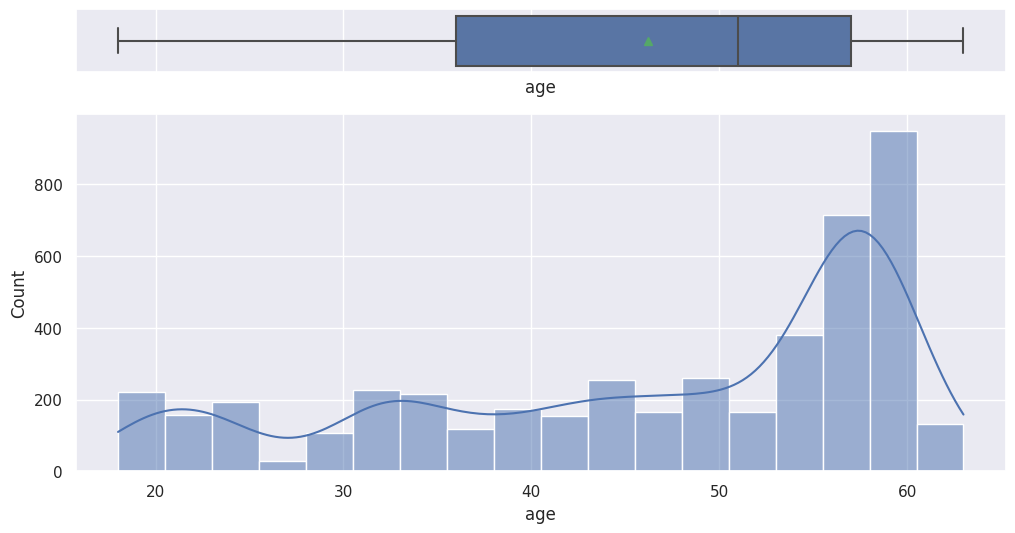

In [155]:
#Univariate analysis on Age
hist_box(data, "age")

*  The distribution for Age is left-skewed
*  Age range for most leads is between 50 and 60
* We could check bivariate analysis to observe the percentage of leads above 50 have actually converted into customers.



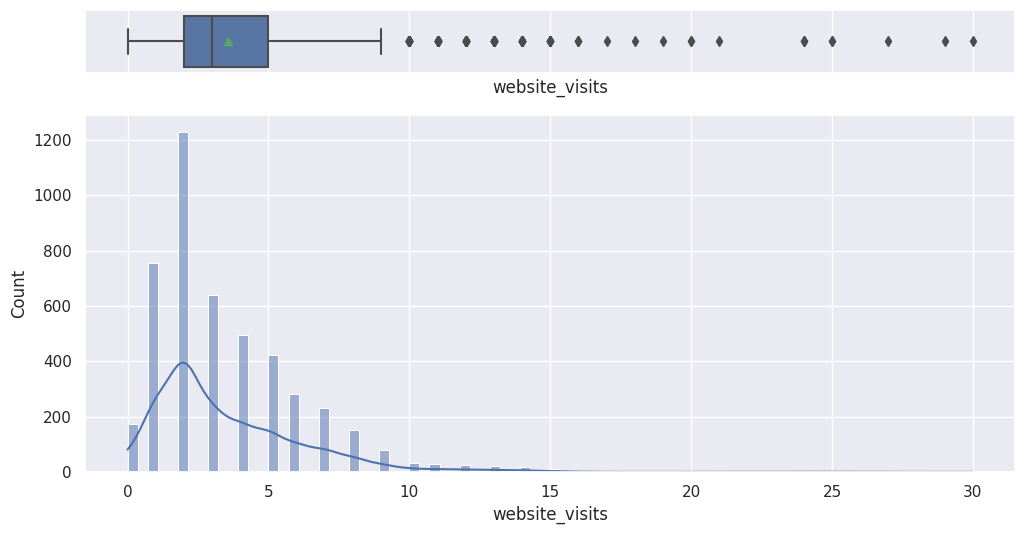

In [156]:
#Univariate analysis on website_visits
hist_box(data, "website_visits")



*   Website visits distribution is right-skewed.
*   Website visits count for most leads is less than 5.
* There are some observations that can be considered as outliers as they are very far from the upper whisker in the boxplot.


In [157]:
#Checking the number of leads that have not visited web-site
data[data["website_visits"] == 0]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
33,56,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
37,59,Professional,Website,High,0,0,0.0,Email Activity,No,No,No,No,No,1
54,28,Professional,Mobile App,High,0,0,0.0,Email Activity,No,No,No,Yes,No,0
94,49,Unemployed,Website,High,0,0,0.0,Email Activity,Yes,No,No,No,No,1
127,54,Professional,Mobile App,High,0,0,0.0,Phone Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,53,Professional,Mobile App,High,0,0,0.0,Email Activity,No,No,No,Yes,No,0
4447,38,Professional,Website,Medium,0,0,0.0,Email Activity,No,No,No,No,No,0
4453,56,Professional,Website,High,0,0,0.0,Phone Activity,No,No,No,No,No,1
4557,48,Unemployed,Mobile App,Medium,0,0,0.0,Email Activity,No,No,No,No,No,0


In [158]:
df1 = data[data["website_visits"] == 0]
df1[df1["status"] == 1].count()

age                      32
current_occupation       32
first_interaction        32
profile_completed        32
website_visits           32
time_spent_on_website    32
page_views_per_visit     32
last_activity            32
print_media_type1        32
print_media_type2        32
digital_media            32
educational_channels     32
referral                 32
status                   32
dtype: int64

Out of the 174 leads that have never visited the website, only 32 have become actual customers.

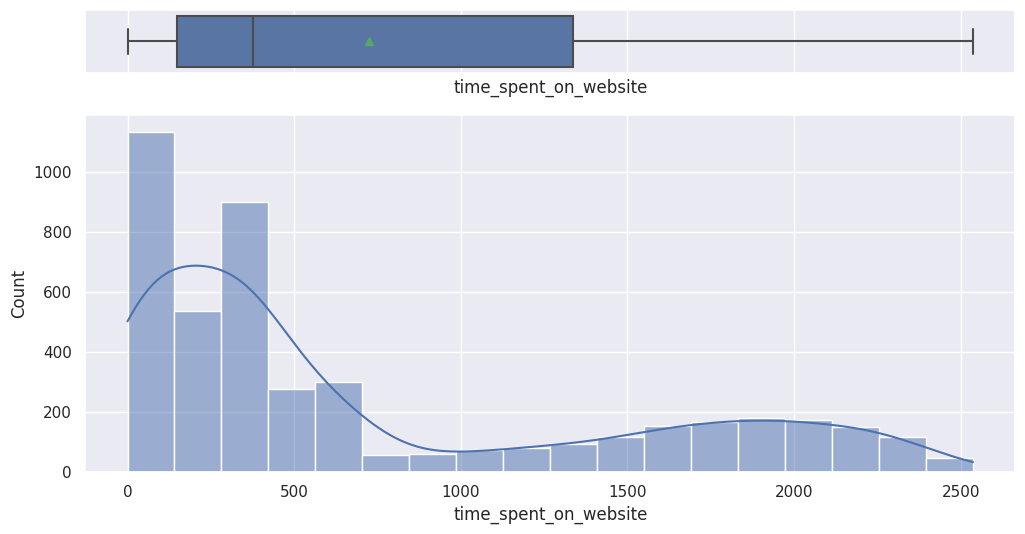

In [159]:
#Univariate analysis on time_spent_on_website
hist_box(data, "time_spent_on_website")


*  The distribution for time-spent on website is right-skewed.
*  The time spent on the website for most leads is less than 600 seconds.

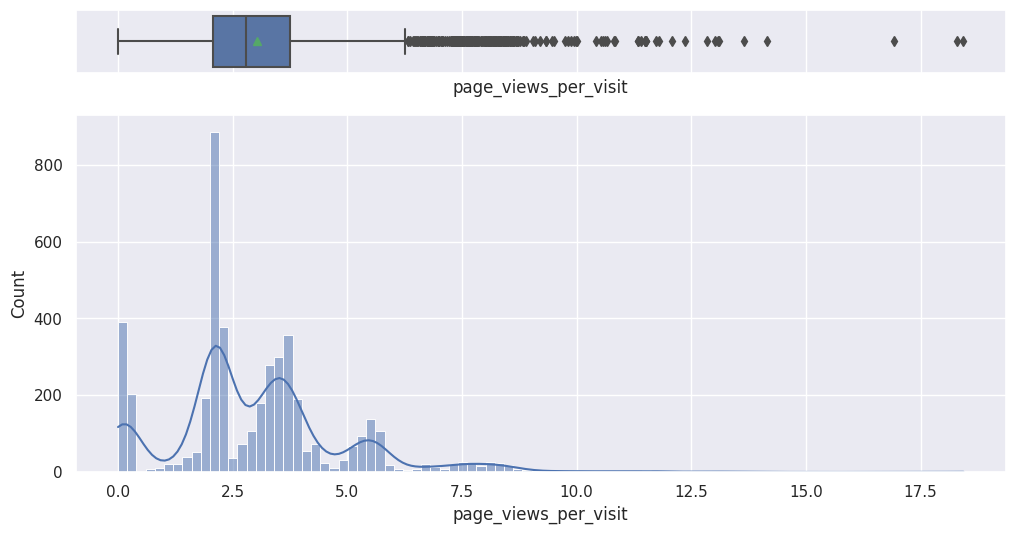

In [160]:
#Univariate analysis on page_views_per_visit
hist_box(data, "page_views_per_visit")



*  The distribution of page views per visit is right-skewed
* Average page views per visit is about 2.8
*   Boxplot shows that the number of trips has some outliers at the right end.



In [161]:
data[data['page_views_per_visit']>10.0].count()

age                      27
current_occupation       27
first_interaction        27
profile_completed        27
website_visits           27
time_spent_on_website    27
page_views_per_visit     27
last_activity            27
print_media_type1        27
print_media_type2        27
digital_media            27
educational_channels     27
referral                 27
status                   27
dtype: int64

In [162]:
df1 = data[data['page_views_per_visit'] == 0.0]
df1[df1['website_visits'] > 0]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
2116,57,Professional,Mobile App,Medium,7,80,0.0,Phone Activity,No,No,No,Yes,No,0
2156,51,Unemployed,Website,Medium,3,1,0.0,Email Activity,No,No,No,No,No,0
2632,59,Professional,Website,Medium,3,1,0.0,Email Activity,No,No,No,No,No,0
3115,60,Unemployed,Website,Medium,9,230,0.0,Email Activity,No,No,No,No,No,0
3454,57,Professional,Website,Medium,7,1802,0.0,Email Activity,No,No,No,Yes,No,1
4203,34,Unemployed,Mobile App,Medium,1,1,0.0,Email Activity,No,No,No,No,No,0
4204,30,Professional,Mobile App,Medium,4,1991,0.0,Email Activity,Yes,No,No,No,No,0


## Observation:
7 records indicate that the leads have visited the website once or more, but the page views per visit is 0. This could mean that the data collection process on page views metrics could be incorect.

#### **Distribution of the categorical variables**

## Observations on current_occupation

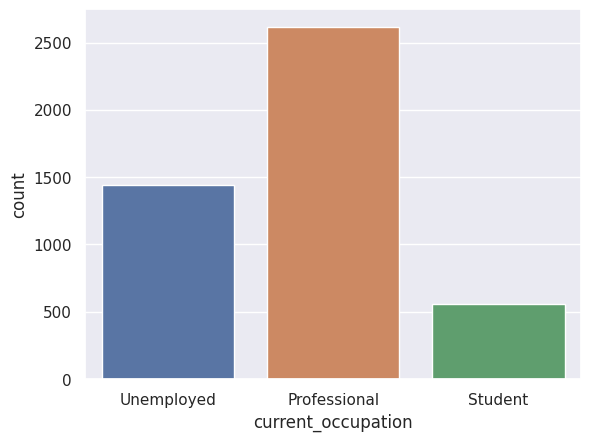

In [163]:
sns.countplot(x = data['current_occupation'])
plt.show()

 Professional (employed) leads are high in number while the Student leads are only 555

## Observations on first_interaction count

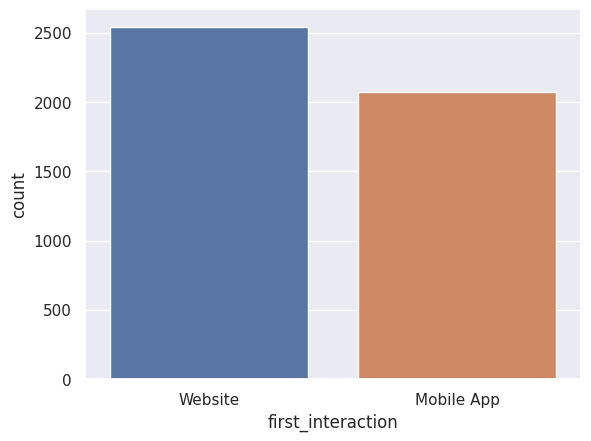

In [164]:
sns.countplot(x = data['first_interaction'])
plt.show()

The number of First interaction of the leads with ExtraaLearn team via Website is a little greater than via Mobile app, but still considerably good number

## Observations on profile_completed



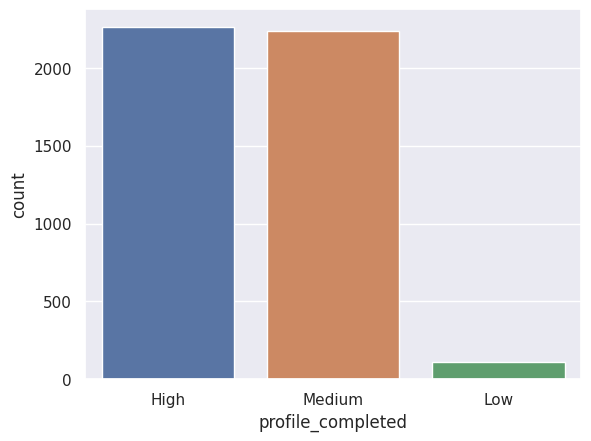

In [165]:
sns.countplot(x = data['profile_completed'])
plt.show()

Very minimal number of leads haven't completed their profiles

## Observations on last_activity

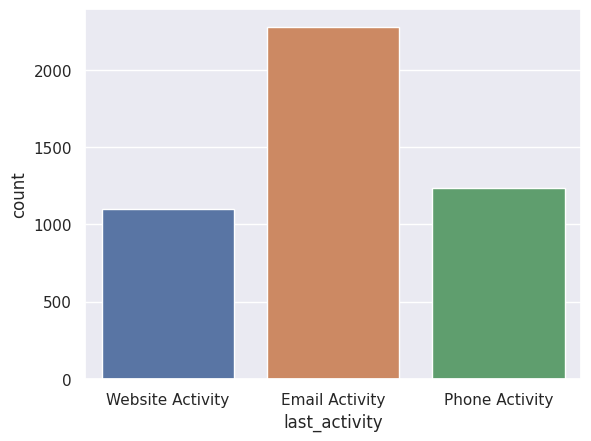

In [166]:
sns.countplot(x = data['last_activity'])
plt.show()

Website Activity and Phone Activity is comparitively less than the Email Activity in terms of last interaction between the lead and ExtraaLearn.
So company needs to put more focus on support team readily available to attend emails and provide prompt responses to gain more paid customers.

## Observations on print_media_type1

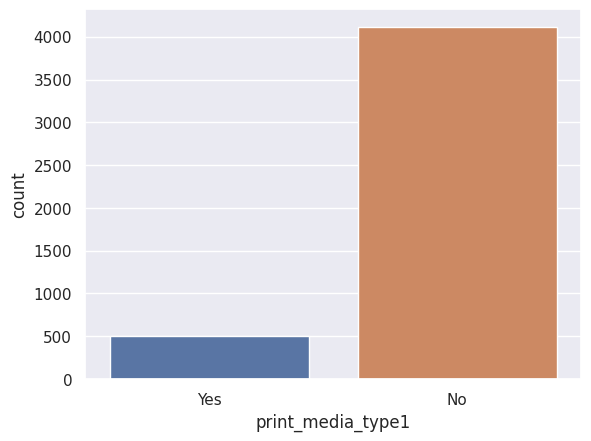

In [167]:
sns.countplot(x = data['print_media_type1'])
plt.show()

This plot indicates that very less number of leads have seen the Newspaper ad

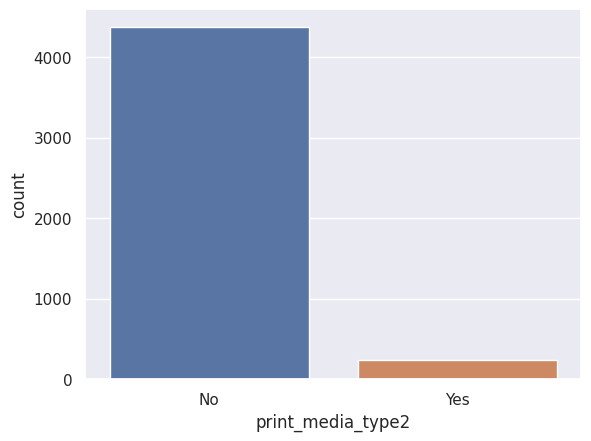

In [168]:
sns.countplot(x = data['print_media_type2'])
plt.show()

This plot indicates that very few number of leads have seen the Magazine ad, which lesser than the number of leads that have seen the Newspaper ad

## Observations on digital_media

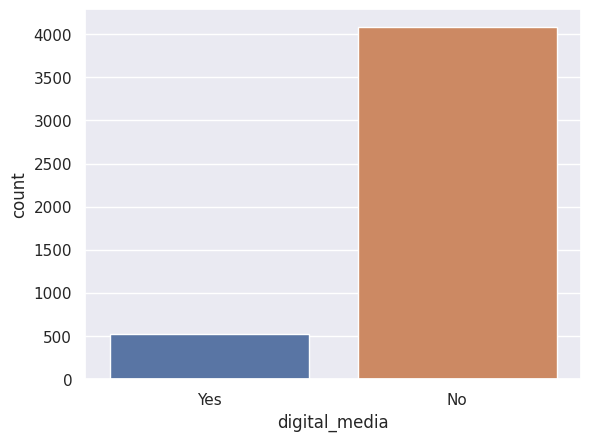

In [169]:
sns.countplot(x = data['digital_media'])
plt.show()

This plot indicates that only about 500 out of all the leads have seen the Digital media ad

## Observations on educational_channels

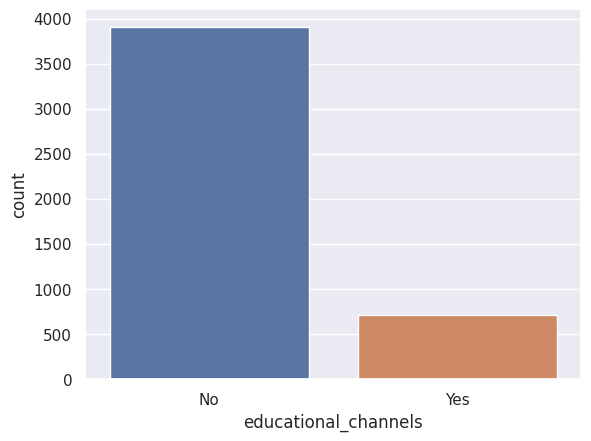

In [170]:
sns.countplot(x = data['educational_channels'])
plt.show()

This plot indicates that percentage of leads that have seen the ad oneducational channels is also very less

## Observations on referral

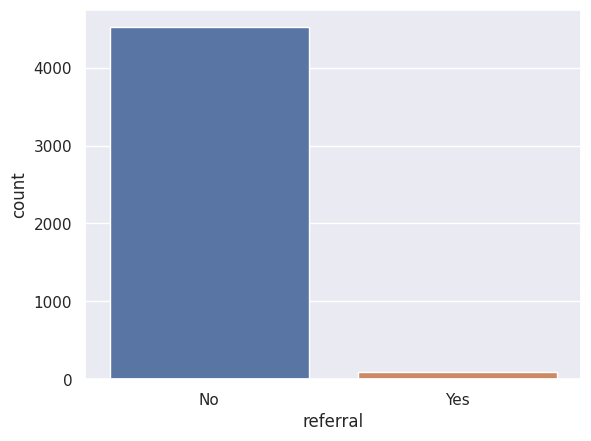

In [171]:
sns.countplot(x = data['referral'])
plt.show()

Percentage of leads that have heard about ExtraaLearn through reference is very minimal.

## Observations on Status

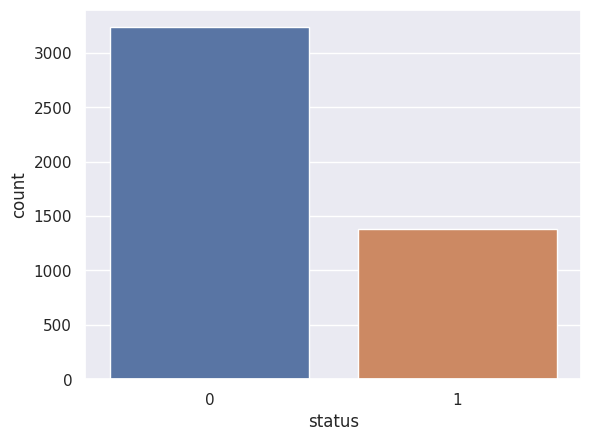

In [172]:
sns.countplot(x = data['status'])
plt.show()

Number of paid customers is less than the unpaid customers/leads.

In [173]:
data['status'].value_counts(normalize=True)

0    0.701431
1    0.298569
Name: status, dtype: float64

*  This plot shows the distribution of both classes in the target variable is imbalanced.
*  We only have approx 30% have converted to paid customers.

## Bivariate Analysis

 ## Plotting the correlation matrix using a heatmap

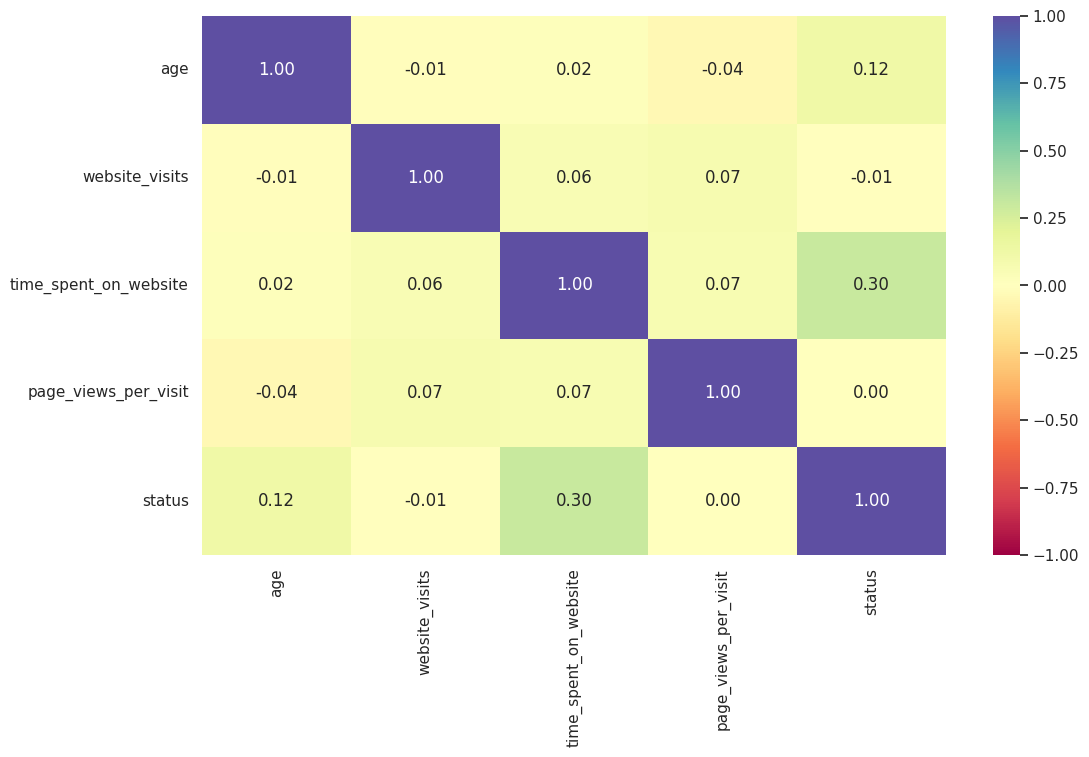

In [174]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()



*   **Status** has a positive correlation with **Time_spent_on_website** and **age**
*  Website visitsseems to be negatively correlated with both Age and Status.
*  No other correlations are considerably important according to this heatmap



**To analyse how the target variable varies across predictor categories, we define following two functions -**
* distribution_plot_wrt_target
* stacked_barplot

In [175]:
# function to plot distributions with respect to target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [176]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Plotting the stacked barplot for categorical variable 'current_occupation' against the target variable 'status'**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


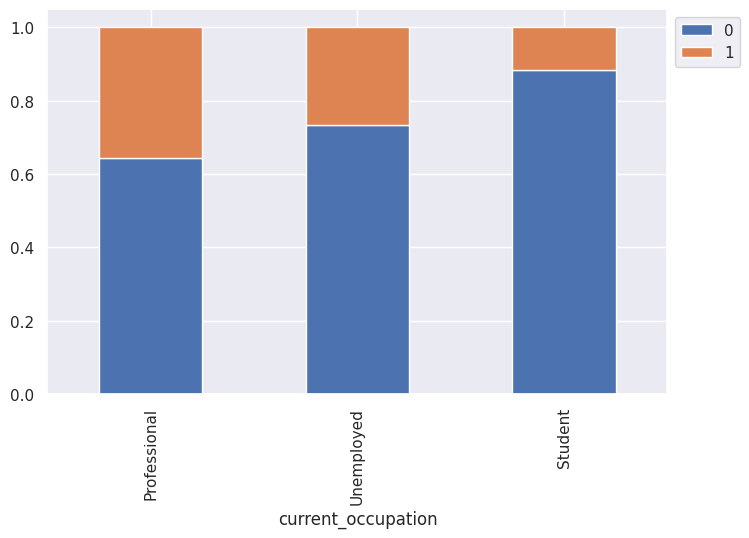

In [177]:
stacked_barplot(data, "current_occupation", "status")



*   Professional leads are more inclined to become paid customers compared to unemployed and student leads
*   ExtraaLearn can target Professional customers **more** with their current packages and look into introducing cheaper packages for unemployed and students to make it affordable to become paid customers.



**Checking stats on 'age' grouping by 'current_occupation'**

In [178]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


* Targeting the Professional group between 42 and 57 years of age could be profittable

**Next comes 'first-interaction' feature. Plotting the stacked barplot for categorical variable 'first_interaction' against the target variable 'status'**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


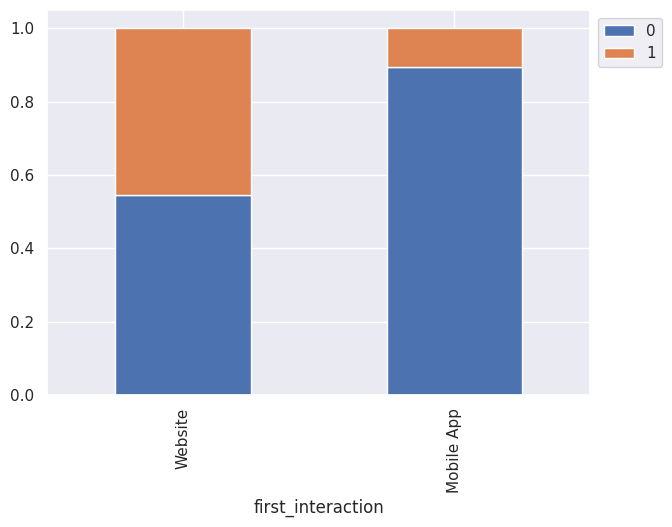

In [179]:
stacked_barplot(data, "first_interaction", "status")

* Higher rate of conversion to paid customers is observed when the leads have first interacted with ExtraaLearn team via website rather than the ones that have interacted via Mobile app.
* The company should improve the user experience on their Mobile app to enable smoother interaction.

**Next feature is 'profile_completed'. Stacked barplot for ot against 'status'**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


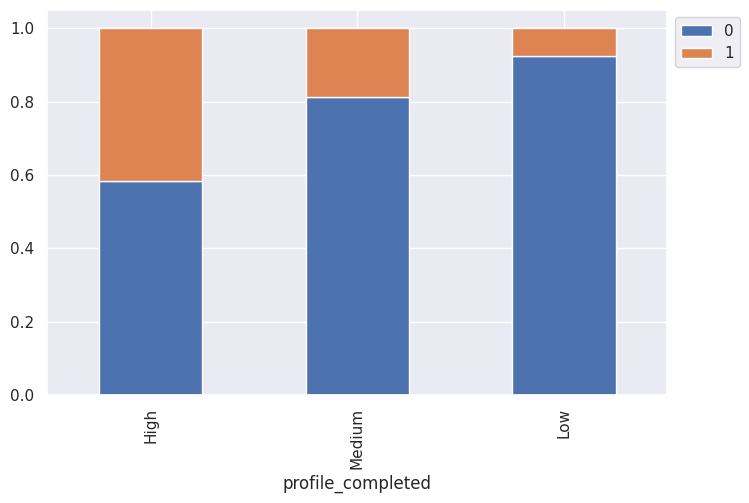

In [180]:
stacked_barplot(data, "profile_completed", "status")

* The higher the amount of leads that complete the profile, the more chances that they convert to paid customers.

**Next numerical feature is 'website_visits'. So plotting distribution for 'website_visits' and 'status'**

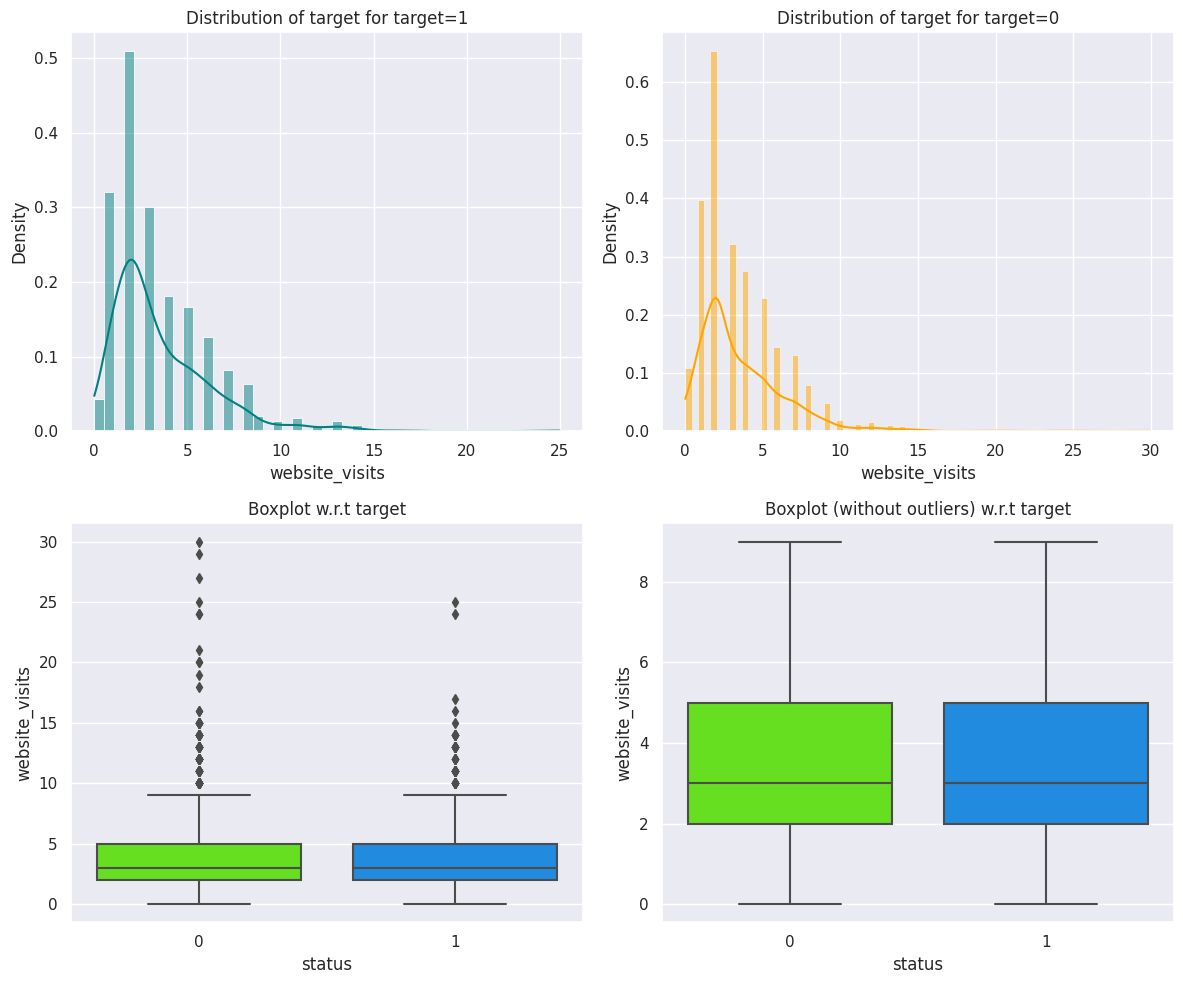

In [181]:
distribution_plot_wrt_target(data, "website_visits", "status")

* There is'nt much impact observed on the target variable with varied website_vists

**Plotting distribution for the next numerical variable 'time_spent_on_website' and 'status'**

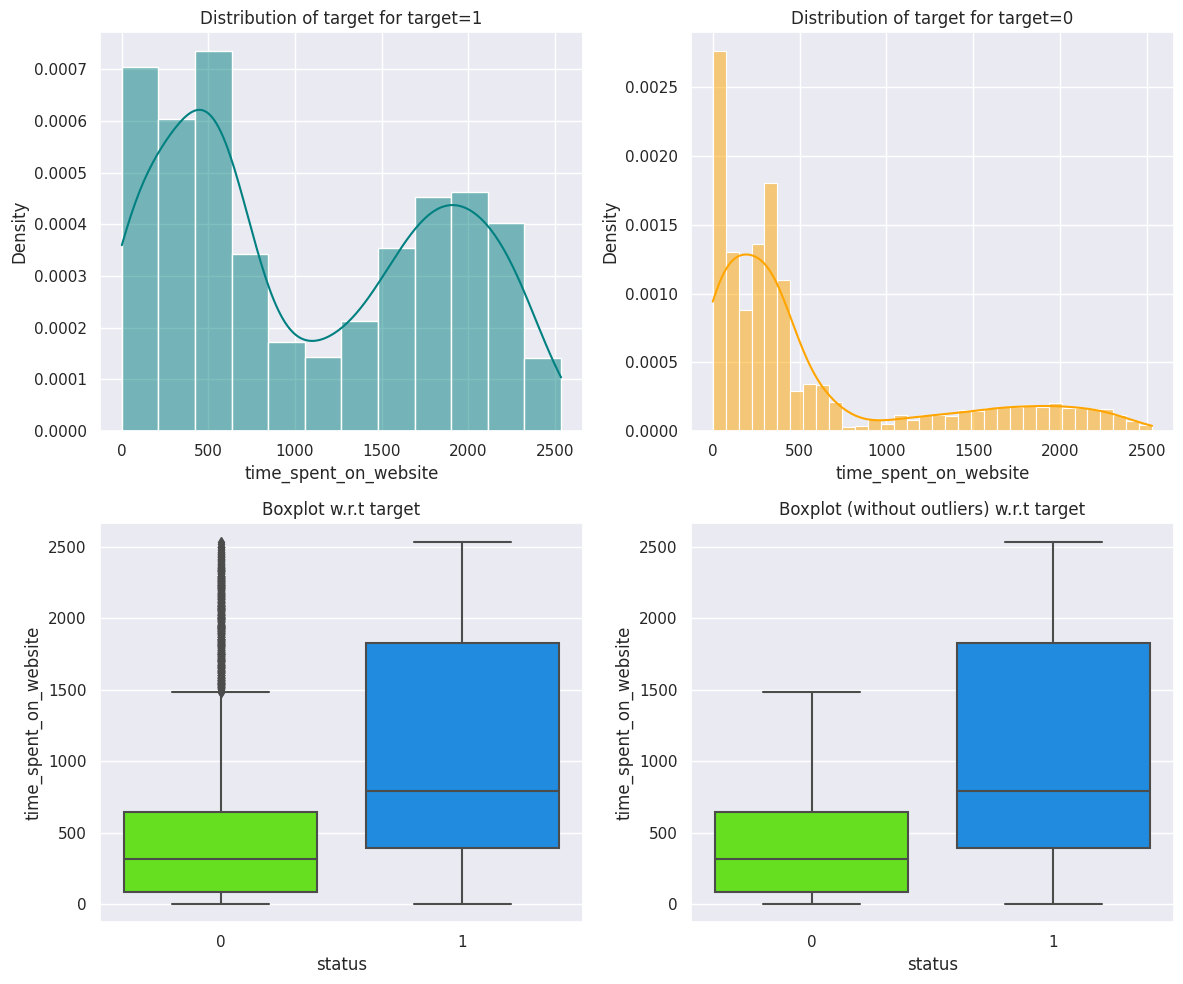

In [182]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [183]:
data.groupby(["status"])["time_spent_on_website"].median()

status
0    317.0
1    789.0
Name: time_spent_on_website, dtype: float64

* According to the plots and the median stats above, the paid customers have spent more time on the website than the unpaid leads

**Plotting distribution for the next numerical variable 'page_views_per_visit' and 'status'**

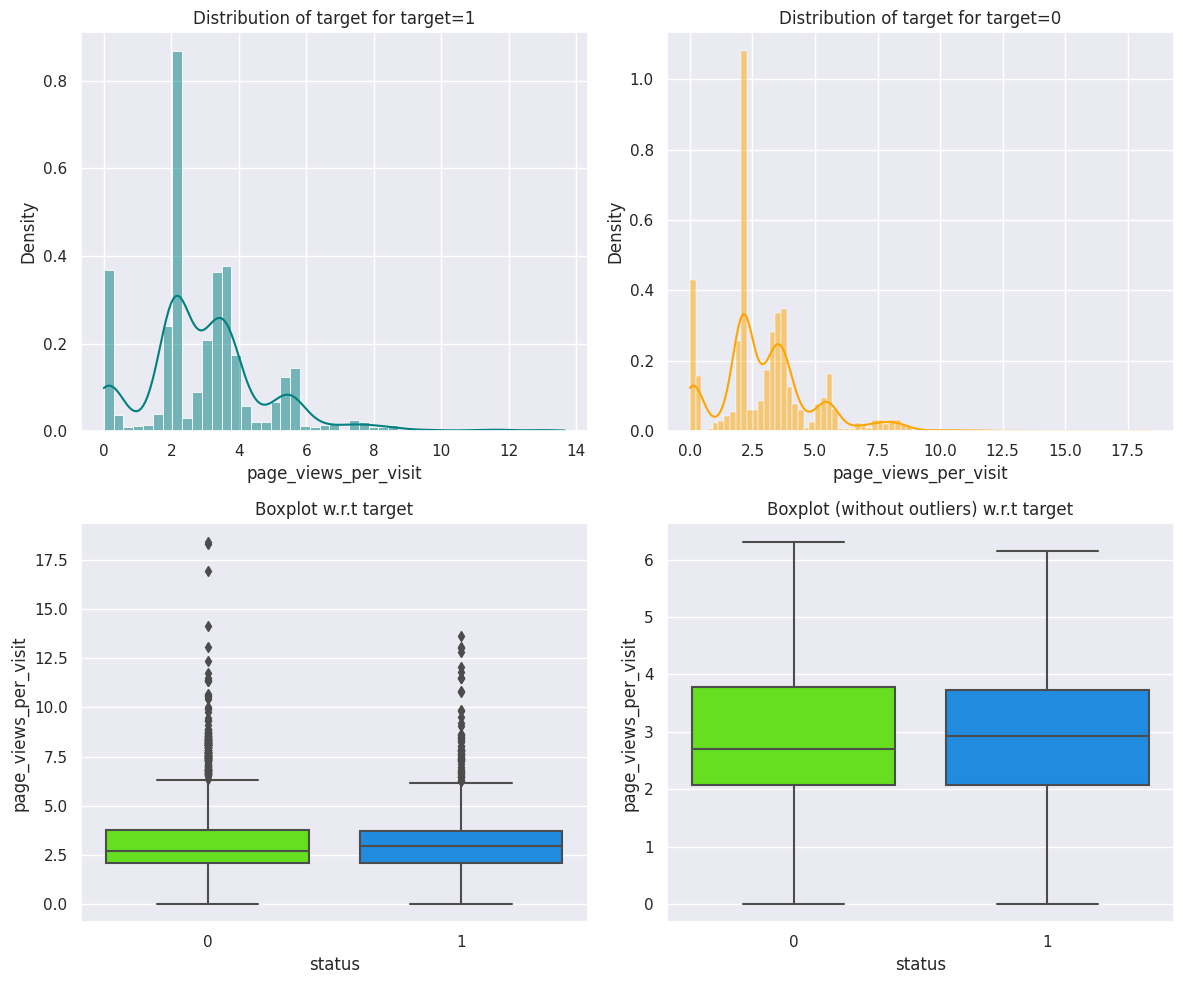

In [184]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status")

* There is'nt much impact observed on the target variable, 'status', with varied page_visits_per_visit

**Next categorical variable is 'last_activity'**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


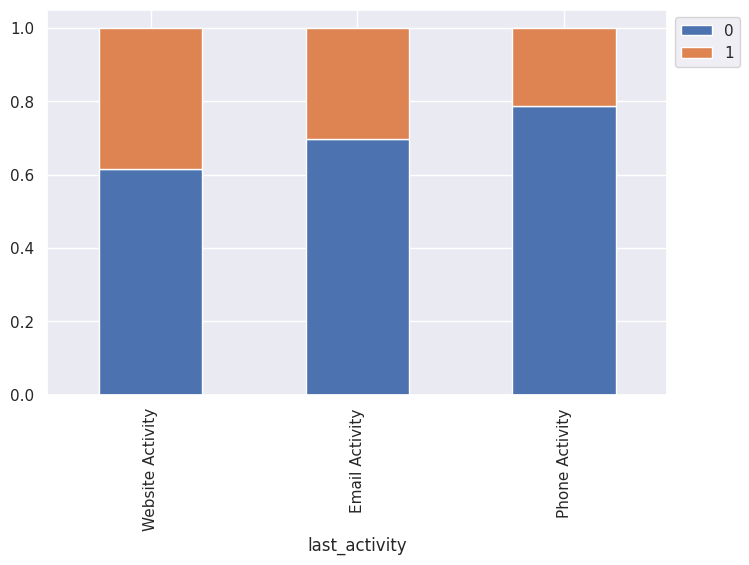

In [185]:
stacked_barplot(data, "last_activity", "status")

* Even though the number of last activity count via Emails is double the website's activity count, the percentage of Paid customers is seen to be more in Website interaction category while the ones interacting via Phone has least paid customers.

**Next categorical variable is 'print_media_type1' (Newspaper ads)**


status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


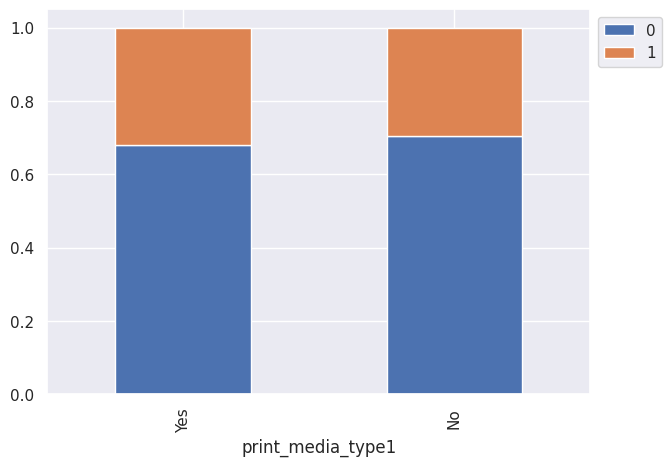

In [186]:
stacked_barplot(data, "print_media_type1", "status")

* The conversion rate is approximately the same for customers/leads who see or do not see the add on Newspaper

**Next categorical variable is 'print_media_type2' (Magazine ads)**


status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


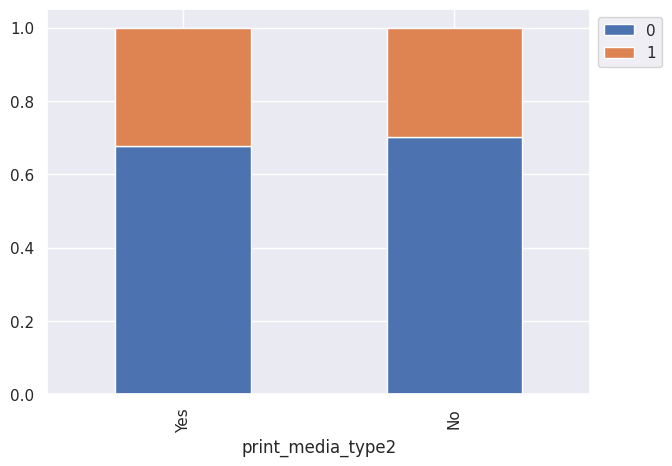

In [187]:
stacked_barplot(data, "print_media_type2", "status")

* The conversion rate is approximately the same for customers/leads who see or do not see the add on Magazines

**Next categorical variable is 'digital_media'**

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


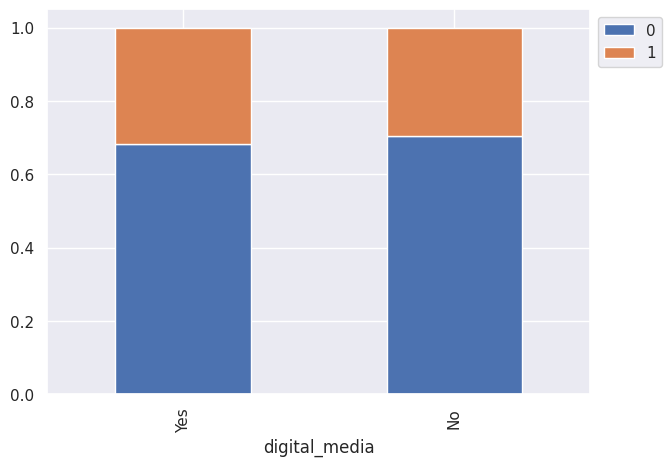

In [188]:
stacked_barplot(data, "digital_media", "status")

* The conversion rate is approximately the same for customers/leads who see or do not see the add on Digital media

**Next categorical variable is 'educational_channels'**

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


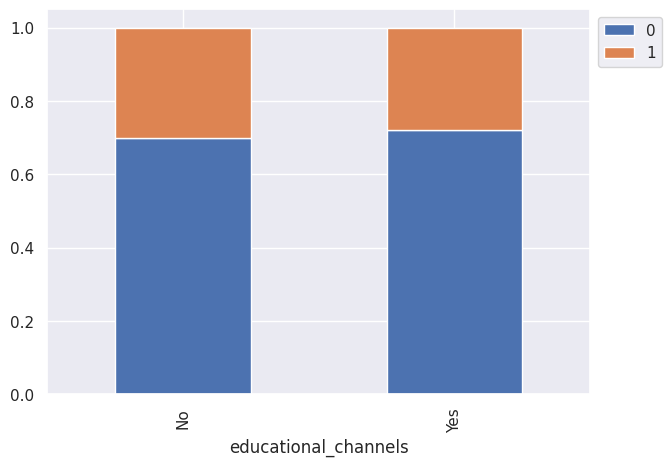

In [189]:
stacked_barplot(data, "educational_channels", "status")

* The conversion rate is approximately the same for customers/leads who see or do not see the add on Educational channels

**Next categorical variable is 'referral'**

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


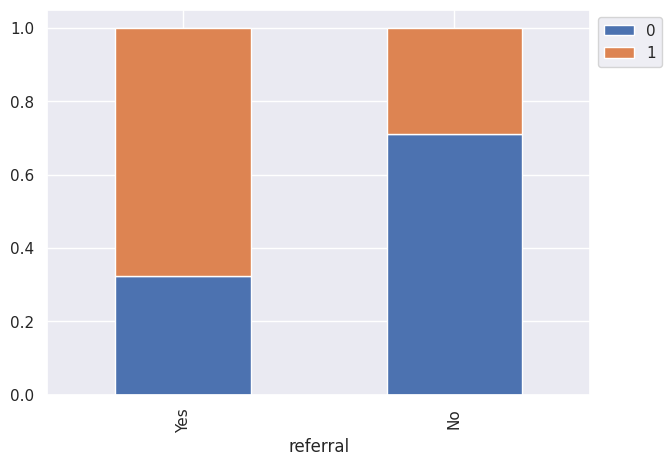

In [190]:
stacked_barplot(data, "referral", "status")

* Even though the number of leads hearing about ExtraaLearn through a referral are very low, the convertion rate for these leads are very high, compared to the leads without any referrals.
* So the company should focus more on the working with existing paid customers to refer their programs to friends and acquaintances.

## Outlier check

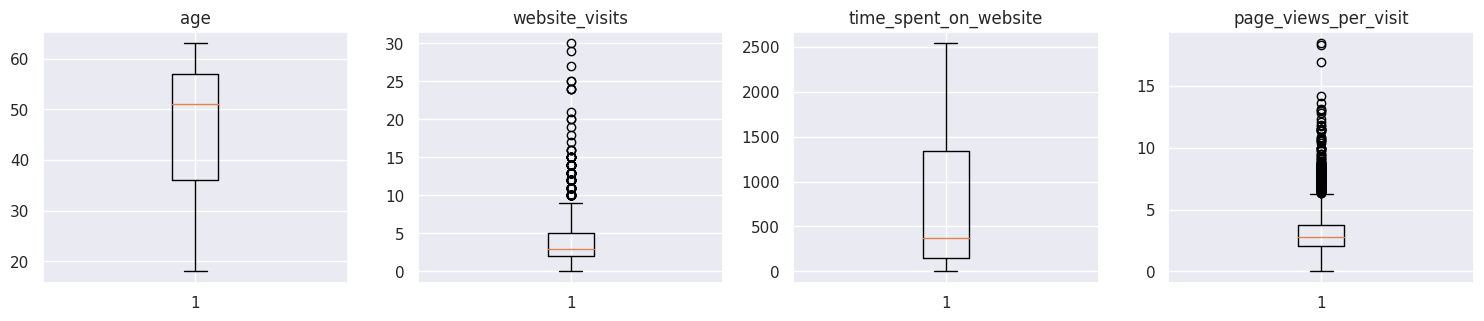

In [191]:
# outlier detection on numerical columns using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping status column as it is the taget variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [192]:
data[data['website_visits']>15].count()

age                      17
current_occupation       17
first_interaction        17
profile_completed        17
website_visits           17
time_spent_on_website    17
page_views_per_visit     17
last_activity            17
print_media_type1        17
print_media_type2        17
digital_media            17
educational_channels     17
referral                 17
status                   17
dtype: int64

In [193]:
data[data['page_views_per_visit']>10.0].count()

age                      27
current_occupation       27
first_interaction        27
profile_completed        27
website_visits           27
time_spent_on_website    27
page_views_per_visit     27
last_activity            27
print_media_type1        27
print_media_type2        27
digital_media            27
educational_channels     27
referral                 27
status                   27
dtype: int64

#### Removing outliers for website_visits and page_views_per_visit

In [194]:
df_nooutliers = data.copy()

In [195]:
# Dropping observaions with website visits greater than 15 - 17 records
df_nooutliers.drop(index=df_nooutliers[df_nooutliers.website_visits>15].index,inplace=True)

In [196]:
# Dropping observaions with page views per visit greater than 10.0 - 27 records
df_nooutliers.drop(index=df_nooutliers[df_nooutliers.page_views_per_visit>10.0].index,inplace=True)

In [197]:
df_nooutliers.shape

(4568, 14)

In [198]:
data.shape

(4612, 14)

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Treating missing values**

* There are no missing values to be treated

**Separating the independent variables (X) and the dependent variable (Y)**

In [199]:
# Separating target variable and other variables
X=df_nooutliers.drop(columns='status')
Y=df_nooutliers['status']

**Getting dummies for X**

In [200]:
X = pd.get_dummies(X, drop_first=True)

**Splitting the data into train and test sets**

In [201]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

**Scaling the data**

*  Tree based models such as Decision Trees and Random Forest does not require feature scaling to be performed as they are not sensitive to the variance in the data.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [202]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3197, 16)
Shape of test set :  (1371, 16)
Percentage of classes in training set:
0    0.701908
1    0.298092
Name: status, dtype: float64
Percentage of classes in test set:
0    0.701678
1    0.298322
Name: status, dtype: float64


## Building a Decision Tree model

In [203]:
# Creating metric function to be reused for all models
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [204]:
# Fitting the decision tree classifier on the training data
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2244
           1       1.00      1.00      1.00       953

    accuracy                           1.00      3197
   macro avg       1.00      1.00      1.00      3197
weighted avg       1.00      1.00      1.00      3197



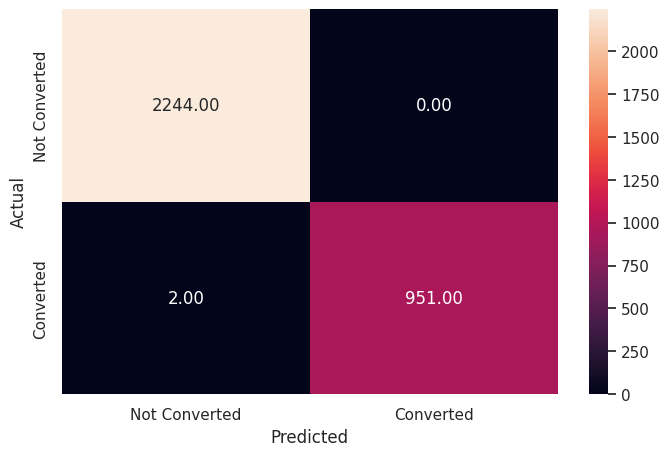

In [205]:
# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)



* With Precision, Recall and f1-score = 1.00, for Status 1, the model has performed very well on the training set
*  False Negatives from the confusion matrix is 0.00
*  Accuracy = 1.00



              precision    recall  f1-score   support

           0       0.86      0.86      0.86       962
           1       0.67      0.68      0.68       409

    accuracy                           0.81      1371
   macro avg       0.77      0.77      0.77      1371
weighted avg       0.81      0.81      0.81      1371



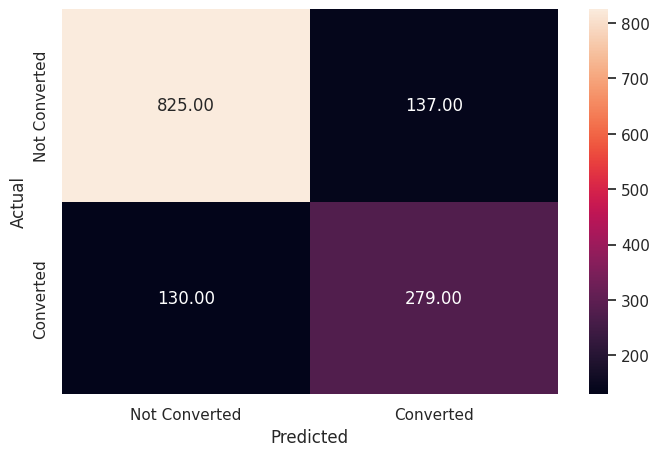

In [206]:
# Checking performance on the test dataset
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

* Evidently, the decision tree model is overfitting, and hence needs to be tuned.

## Do we need to prune the tree?

* Yes, we need to prune the decision tree as it is overfitting. We can try hyperparameter tuning to reduce the overfitting.
* Since losing a potential customer caused due to False Negatives, is a greater loss, we should be interested in maximizing the Recall so we could minimize False Negatives.

In [207]:
### Trying out hyperparameter tuning for the decision tree model using GridSearch CV

estimator = DecisionTreeClassifier(random_state=7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {
  'max_depth': np.arange(2, 10),
  'criterion': ['gini', 'entropy'],
  'min_samples_leaf': [5, 10, 20, 25]
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=7)

#### Checking the performance on training and test sets again

              precision    recall  f1-score   support

           0       0.93      0.77      0.85      2244
           1       0.62      0.87      0.72       953

    accuracy                           0.80      3197
   macro avg       0.78      0.82      0.79      3197
weighted avg       0.84      0.80      0.81      3197



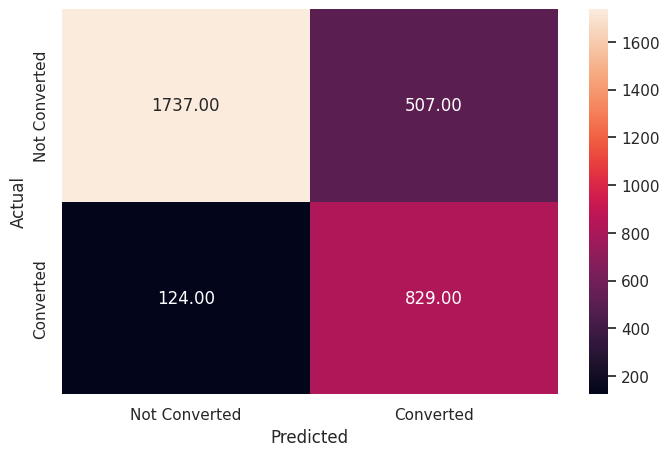

In [208]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

* We can notice a higher recall score on the training set, which is what we wanted.

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       962
           1       0.61      0.89      0.73       409

    accuracy                           0.80      1371
   macro avg       0.78      0.83      0.78      1371
weighted avg       0.84      0.80      0.81      1371



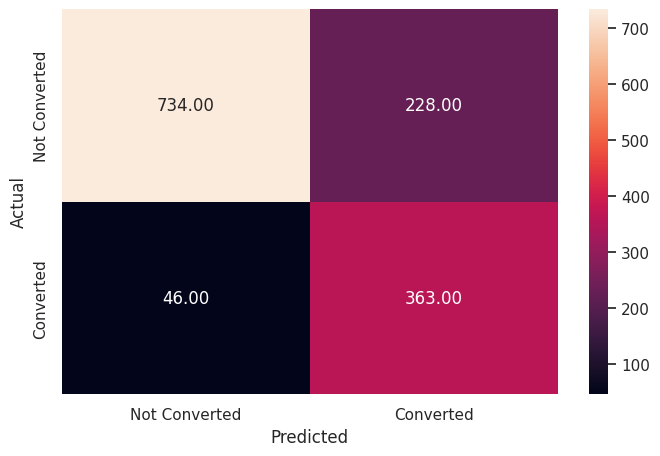

In [209]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

* We can notice the close recall score in both training and test sets in the tuned model.
* The tuned model shows a generalised performance.
* But we could try Random Forest model to see if we can obtain a better performance.

## Building a Random Forest model

In [210]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

**Checking the performance of the model on the train and test data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2244
           1       1.00      1.00      1.00       953

    accuracy                           1.00      3197
   macro avg       1.00      1.00      1.00      3197
weighted avg       1.00      1.00      1.00      3197



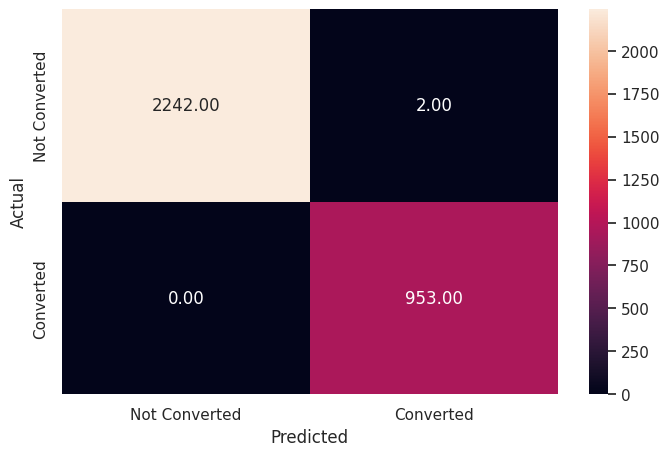

In [211]:
#Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

* Model has performed very well on the training set with overall 100% score for all metrics.

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       962
           1       0.80      0.71      0.75       409

    accuracy                           0.86      1371
   macro avg       0.84      0.81      0.83      1371
weighted avg       0.86      0.86      0.86      1371



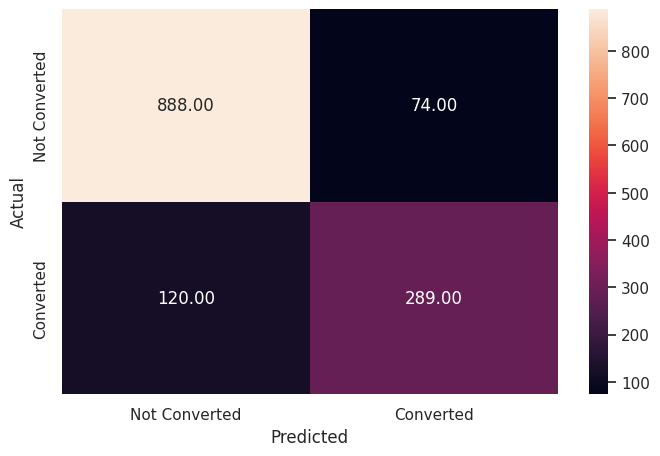

In [212]:
#Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

* Although there is balanced precision and recall values, the Random Forest classifier also seems to be overfitting.
* We can reduce overfitting and improve recall by hyperparameter tuning.

## Do we need to prune the tree?

* Yes, we need pruning to reduce the overfitting

In [213]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj =  GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)
grid_obj =  grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

#### Checking the performance of the tuned RF model on the train and test data

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2244
           1       0.68      0.86      0.76       953

    accuracy                           0.84      3197
   macro avg       0.81      0.85      0.82      3197
weighted avg       0.86      0.84      0.84      3197



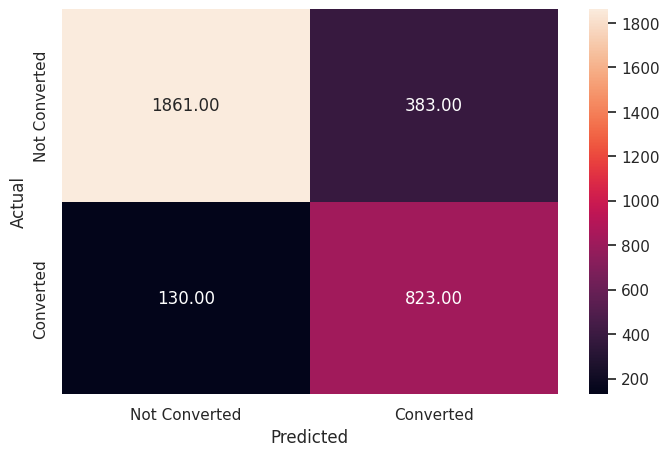

In [214]:
# Checking performance on the training dataset
rf_tuned = rf_estimator_tuned.predict(X_train)
metrics_score(y_train,rf_tuned)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       962
           1       0.68      0.86      0.76       409

    accuracy                           0.84      1371
   macro avg       0.81      0.84      0.82      1371
weighted avg       0.86      0.84      0.84      1371



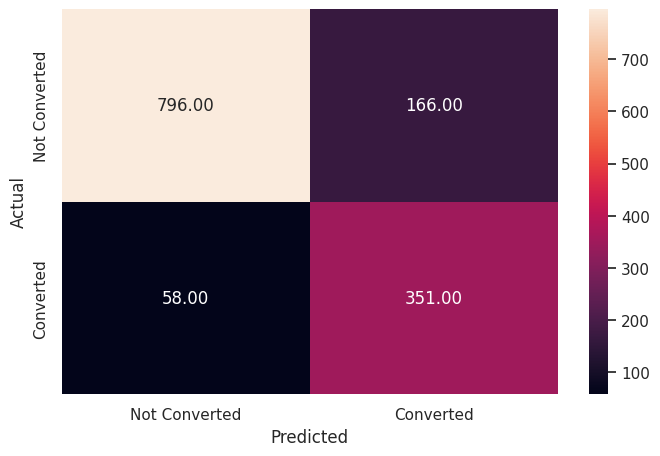

In [215]:
#Checking performance on the testing data
y_pred_rf_tuned = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_rf_tuned)

#### Observations:

* The training data and test data performance results are very close.
* We achieved **better performance** and **higher recall** score in the Tuned Random Forest model with the compared to Decision Tree model and the untuned RF model.


**As we cannot observe the decision rules for random forests, let's check the feature importance of the model.**

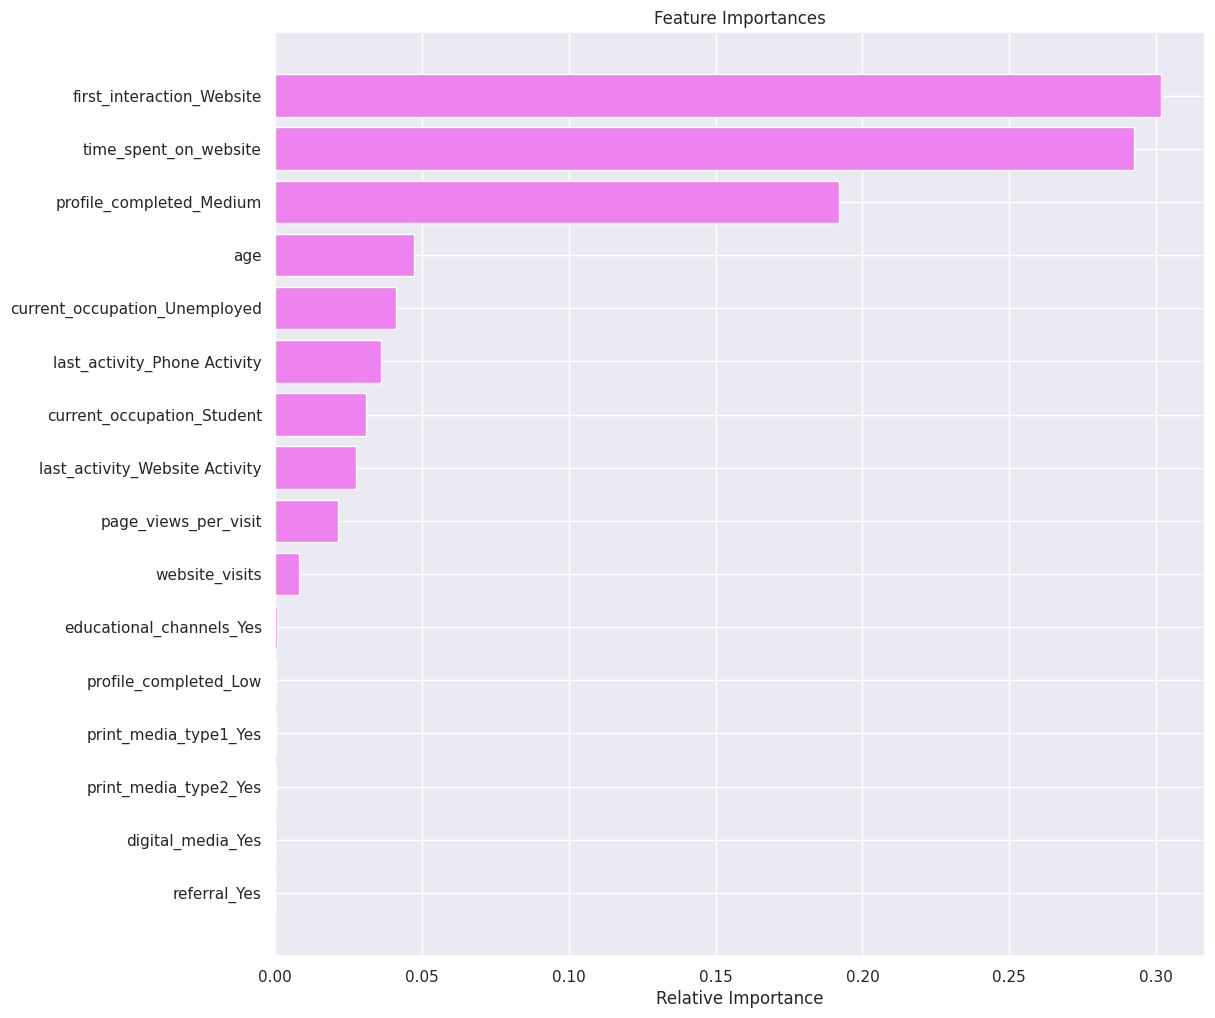

In [216]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

* Top 3 features that are of higher importance are 'time_spent_on_website', 'first_interaction_website' and 'profile_completed_medium'.
* Age, last_activity, current_occupations, page_views_per_visit, website_visits also have considerable weightage in deciding whether a lead will be converted to a priced customer or not.

## Actionable Insights and Recommendations

* Leads who have spent more time on the website have more conversion rate, which is a takeaway that there can be more focus on improving the user experiene of the website in terms of engaging customers to enable them to better understand the value of their paid learning programs.
----------------------------------------
* Higher conversion rate has been observed for leads who had first interaction with ExtraaLearn team via website.
* Since there isn't much difference in the website and mobile app counts (as observed in univariate analysis),  the interaction process must have been better on website compared to mobile app.Hence this will be another focus point to encourage leads to communicate via website.
* The company should improve the user experience on their Mobile app as well to enable smoother interaction.
-------------------------------------
* Professional leads within the age group of 47-57 are more inclined to becoming paid customers compared to unemployed and student leads.
So targeting this group would be highly beneficial.
* Also, the company might have to explore more affordable programs that be provided to Student group to increase revenue from end as well.
-------------------------------------
* As higher conversion rate is observed for leads who complete their profile at least above 75%, ExtraaLearn team needs to look into ways to encourage leads to complete their profiles to provide better learning suggestions which inturn could increase the conversion rate based on our analysis.
--------------------------------------
* As there is more conversion rate for folks who had last activity interacting with ExtraaLearn team via Website, this would be another focal point.
* But at the same time, since the volume of email activity is higher, there should be process improvements in email responses with detailed information provided catering to specific occupation to increase conversion rate from email activity standpoint as well.
--------------------------------------
* And finally Random Forest proved to be a better performing model that can be used to predict potential customers in this case, in terms of performance as well as higher recall rate which is important to not lose a potential customer.
